# Problem 4

In [77]:
import numpy as np
from scipy.special import binom
import matplotlib.pyplot as pyplot

In [78]:
freq_table = np.array([
# en      pl       sp   
[0.08167, 0.10503, 0.11525], # a
[0.12702, 0.07352, 0.12181], # e
[0.06966, 0.08328, 0.06247], # i
[0.07507, 0.02445, 0.08683], # o
[0.02758, 0.02062, 0.02927], # u
[0.01974, 0.03206, 0.01008], # y
[0.59926, 0.66104, 0.57429]])# other
lang_probs = np.array([
# en pl sp  
.3, .3, .3])

languages = ['en', 'pl', 'sp']

def lang2ind(lang):
    return languages.index(lang)

def letter2ind(letter):
    vowels = 'aeiouy'
    i = vowels.find(letter)
    if i == -1: # other
        i = len(vowels)
        assert i == 6
    return i
        
def letter_lang_prob(letter, lang):
    return freq_table[letter2ind(letter), lang2ind(lang)]

In [79]:
def string_lang_prob(string, lang, log_prob=True):
    string = np.array(list(string))
    (letters, counts) = np.unique(string, return_counts=True)
    prob = lang_probs[lang2ind(lang)]
    if log_prob:
        prob = np.log(prob)
    for (l,c) in zip(letters, counts):
        p = letter_lang_prob(l, lang)
        if log_prob:
            prob += c*np.log(p)
        else:
            prob *= p**c
    return prob
        

In [80]:
def classify_string(string):
    probs = [ string_lang_prob(string, lang) for lang in languages ]
    ind = np.array(probs).argmax()
    print(probs, end=' ')
    return languages[ind]

In [81]:
samples = [
    'bull',
    'burro',
    'kurczak',
    'pollo',
    'litwo, ojczyzno moja, ty jesteś jak zdrowie',
    'dinero',
    'mama just killed a man put a gun against his head',
    'maradona es mas grande que pele'
]
for s in samples:
    print(s, ':')
    l = classify_string(s)
    print('result =', l)

bull :
[-6.3308163657853296, -6.3272893844868836, -6.399027333901266] result = pl
burro :
[-8.9201506331825549, -10.03841444754814, -8.8428304288108475] result = sp
kurczak :
[-9.8600043439588934, -9.4086804930127528, -9.6689204985379682] result = pl
pollo :
[-7.9188204939628015, -9.8680457102160712, -7.7554413454420894] result = sp
litwo, ojczyzno moja, ty jesteś jak zdrowie :
[-53.37921974654337, -55.952882877170573, -54.884714385730781] result = en
dinero :
[-10.057025965217166, -11.252665302764944, -10.189999913279435] result = en
mama just killed a man put a gun against his head :
[-61.033693551686511, -57.213614991625064, -59.91504014324137] result = pl
maradona es mas grande que pele :
[-39.955502456771718, -40.980004554386255, -39.046485080939703] result = sp


# Problem 6

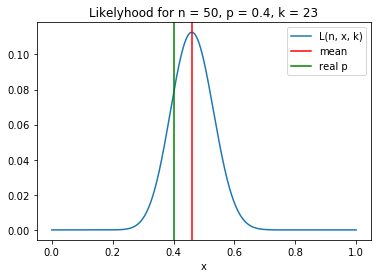

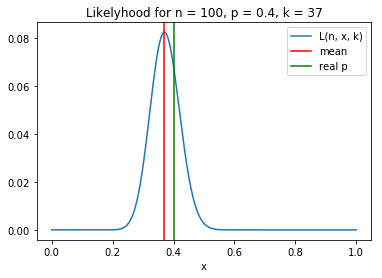

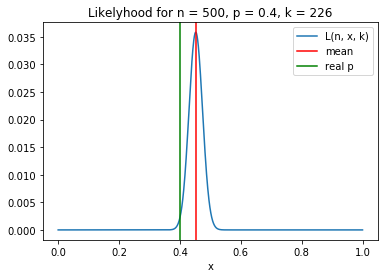

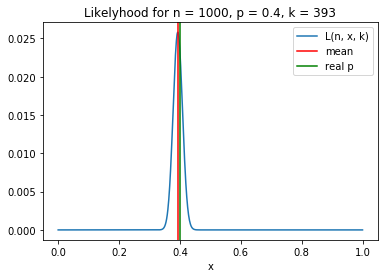

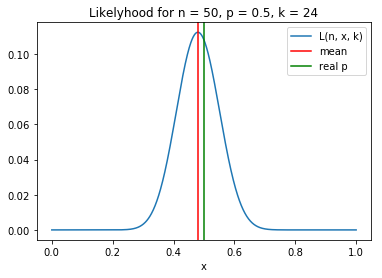

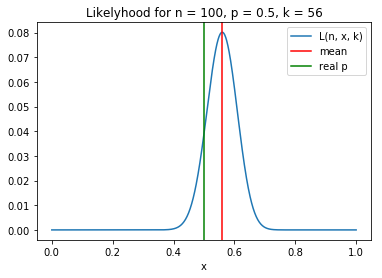

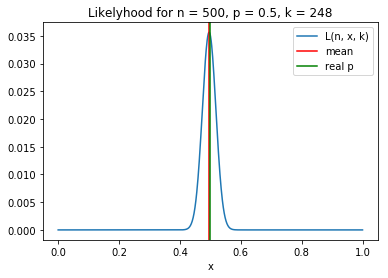

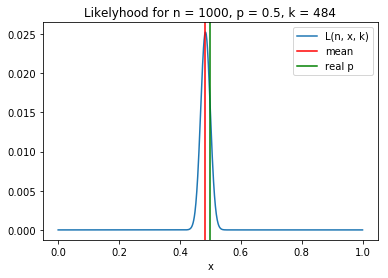

In [82]:
def prob(n, p, k):
    return binom(n, k)*(p**k)*(1.-p)**(n-k)

ns = np.array([50, 100, 500, 1000])
ps = np.array([0.4, 0.5])
ks = np.random.binomial(ns[:,np.newaxis], ps)

for (p_i, real_p) in enumerate(ps):
    for (n_i, n) in enumerate(ns):
        k = ks[n_i, p_i]
        mean = k/n
        xs = np.linspace(0., 1., 1000)
        ys = np.array([ prob(n, x, k) for x in xs ])
        
        pyplot.plot(xs, ys, label="L(n, x, k)")
        pyplot.axvline(mean, color='r', label="mean")
        pyplot.axvline(real_p, color='g', label="real p")
        pyplot.title('Likelyhood for n = {0}, p = {1}, k = {2}'.format(n, real_p, k))
        pyplot.xlabel('x')
        pyplot.legend()
        pyplot.show()

# Problem 7

In [83]:
letters = ['P', 'R', 'S']
initial_prob = [0.333, 0.333]
initial_prob = initial_prob + [1. - sum(initial_prob)]
sequence = 'PPRSSRSPPRSPRRSPPPSSPRSPSPSRSP'

# game results for row player
game_results = np.array([
    0, 1, -1,
    -1, 0, 1,
    1, -1, 0
]).reshape(3,3)

# count consecutive pairs of letters
consecutive = [ ''.join(t) for t in zip(sequence[:-1], sequence[1:]) ]
all_pairs = [ l1+l2 for l1 in letters for l2 in letters ]
(pairs, counts) = np.unique(consecutive+all_pairs, return_counts = True)
counts -= 1
pairs.resize(3,3)
counts.resize(3,3)

counts

array([[4, 4, 3],
       [0, 1, 6],
       [7, 2, 2]])

In [84]:
def generate_sequence(theta, length): # theta should be 3x3
    prev = np.random.choice(3, p=initial_prob)
    yield letters[prev]
    for i in range(length-1):
        prev = np.random.choice(3, p=theta[prev,:])
        yield letters[prev]

In [85]:
unconditional_theta = np.repeat(np.array(initial_prob)[np.newaxis,:], [3], axis=0)
str(list(generate_sequence(unconditional_theta, 20)))

"['R', 'S', 'P', 'S', 'S', 'P', 'R', 'S', 'P', 'S', 'S', 'P', 'P', 'S', 'S', 'S', 'S', 'S', 'S', 'S']"

In [86]:
def simulate(theta1, theta2, length):
    seq1 = generate_sequence(theta1, length)
    seq2 = generate_sequence(theta2, length)
    zipped = [ (letters.index(pair[0]), letters.index(pair[1])) for pair in zip(seq1, seq2) ]
    unzipped = list(zip(*zipped)) # in Python zip == unzip!
    results = game_results[unzipped]
    print(results)
    return np.sum(results)
    
simulate(unconditional_theta, unconditional_theta, 3)

[0 0 1]


1

In [87]:
def ll(theta): # theta should be 3x3
    ll = initial_prob[letters.index(sequence[0])]
    ll = np.log(ll)
    ll += np.sum(counts*np.log(theta))
    return ll
ll(unconditional_theta)

-32.955400137091971

In [88]:
# how to maximize ll ?